<a href="https://colab.research.google.com/github/NanTum/GeosDataSci/blob/master/Fire_Data_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fire Data 3D using Matplotlab

## โหลดข้อมูลจาก Github

In [1]:
import pandas as pd

In [2]:
firedata=pd.read_excel('https://github.com/NanTum/GeosDataSci/raw/master/Fire_Data.15240.1598195125.4438.xlsx')

## จัดการข้อมูล

In [3]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [4]:
firedata.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

In [5]:
firedata.ACQ_TIME= firedata.ACQ_TIME.astype(str)
firedata.ACQ_DATE= firedata.ACQ_DATE.astype(str)

## แปลงข้อมูล

In [6]:
df = pd.DataFrame({'year': firedata.ACQ_DATE.str[0:4],
                   'month': firedata.ACQ_DATE.str[5:7],
                   'day': firedata.ACQ_DATE.str[8:10],
                   'hour': firedata.ACQ_TIME.str[:-2],
                   'minute': firedata.ACQ_TIME.str[-2:]})
firedata['DateTime']=pd.to_datetime(df)

In [7]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00


In [8]:
firedata.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE              object
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
DateTime      datetime64[ns]
dtype: object

## Plot ข้อมูล

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

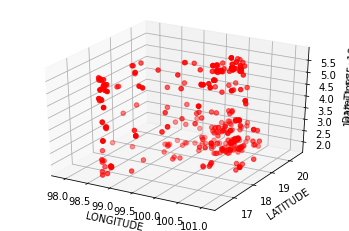

In [10]:
# Axes3D.plot3D(firedata.LONGITUDE,firedata.LATITUDE,firedata.DateTime)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=firedata.LONGITUDE[:400]
y=firedata.LATITUDE[:400]
z=firedata.DateTime[:400]
# ax.scatter(x, y, z)
ax.scatter(np.asarray(x, dtype = "float"), np.asarray(y, dtype = "float"), np.asarray(z, dtype = "float"), c='red')

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')
ax.set_zlabel('DateTime')

plt.show()